# Practicing exploratory data visualisation techniques by analyzing traffic on I-94 highway

In this project we are going to find any indicators for heavy traffic  on the I-94 highway using recently learned visualisation techniques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic.head(5))
print(traffic.tail(5))
print(traffic.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

We can see that:
1. records were made every hour
2. there are no null values
3. all numerical columns are in  float or int types
4. all column names match snakecase style
5. date_time column could be converted to datetime type

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

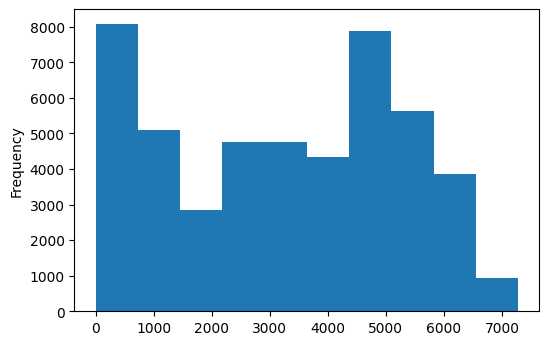

In [2]:
traffic['traffic_volume'].plot.hist()
traffic['traffic_volume'].describe()

We can see from the traffic_volume histogram, that it is quite often, that there are almost no traffic (25% of all values lies between 0 and 1193).
It could be because of nighttime includes in our data set. If we look on values over 2000, the histogram looks very familiar to normal

To figure it out we'll divide our dataset into two parts: daytime and nighttime. But firstly we must convert values in date_time column to datetime

In [3]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

day = (traffic['date_time'].dt.hour > 6 ) & (traffic['date_time'].dt.hour < 19 )
night = (traffic['date_time'].dt.hour > 18 ) | (traffic['date_time'].dt.hour < 7 )
traffic_day = traffic.copy()[day]
traffic_night = traffic.copy()[night]
print(traffic.shape)
print(traffic_day.shape)
print(traffic_night.shape)

(48204, 9)
(23877, 9)
(24327, 9)


We are going to compare day and night traffics histograms

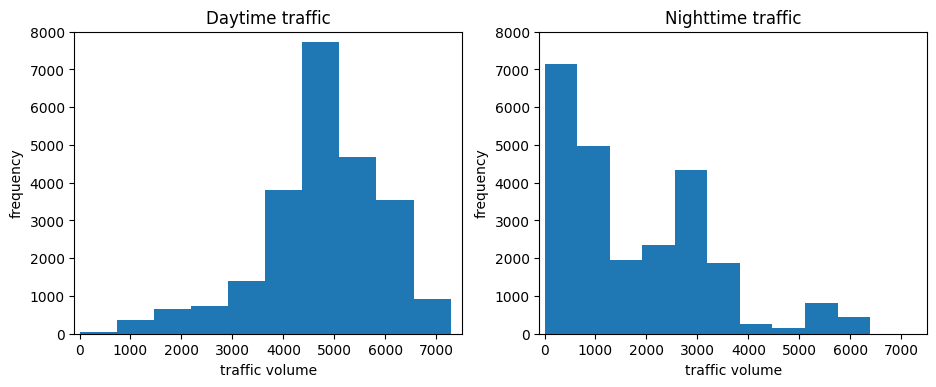

In [4]:
plt.figure(figsize = (11, 4))

plt.subplot(1, 2, 1)
plt.hist(traffic_day['traffic_volume'])
plt.title('Daytime traffic')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel('traffic volume')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.title('Nighttime traffic')
plt.hist(traffic_night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel('traffic volume')
plt.ylabel('frequency')

plt.show()

In [5]:
traffic_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
traffic_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The shape of daytime histogram looks like a mix between left skewed and normal, and nighttime histogram looks pretty much like right skewed which means there are almost no traffic volume at nighttime (although we can see slight movement after traffic volume reaches 5000 cars per hour). We'll consider only daytime traffic as we want to find heavy traffic indicators

Now lets look how traffic volume correlates with month, day of the week, and time of the day

Text(0.5, 1.0, 'Traffic by month')

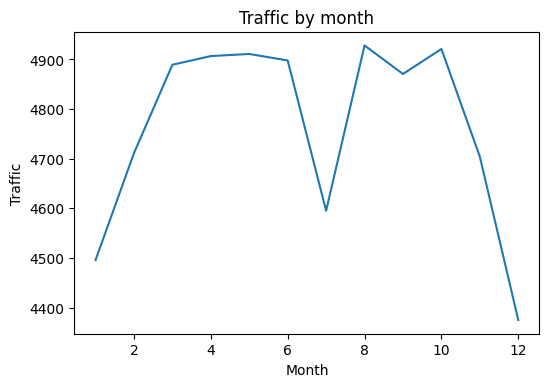

In [7]:
import datetime as dt
traffic_day['month'] = traffic_day['date_time'].dt.month
by_month = traffic_day.groupby('month').mean()
by_month.head(5)
plt.plot(by_month['traffic_volume'])
plt.xlabel('Month')
plt.ylabel('Traffic')
plt.title('Traffic by month')

We can see from the plot above that traffic gets lower on cold months: november - february) with one exception - July. As our dataset includes 6 years we can analize only Julys

Text(0.5, 1.0, 'Traffic in July')

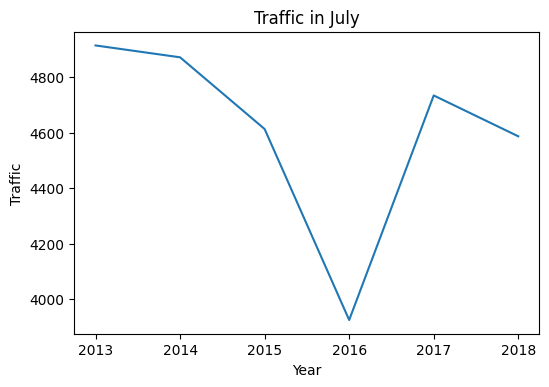

In [8]:
traffic_day['year'] = traffic_day['date_time'].dt.year
by_julys = traffic_day[traffic_day['month'] == 7].groupby('year').mean()

plt.plot(by_julys['traffic_volume'])
plt.xlabel('Year')
plt.ylabel('Traffic')
plt.title('Traffic in July')

We can see that traffic volume is quite constant through years in July with one exception - 2016 with significantly less traffic. According to data set description there was road construction exactly on that period. It all clear now

Now let's explore traffic volume against day of a week

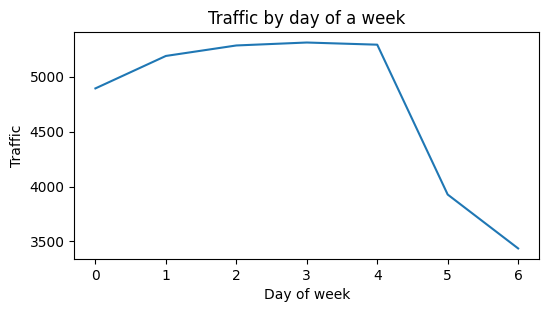

In [9]:
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek
by_dayofweek = traffic_day.groupby('dayofweek').mean()
by_dayofweek.head(5)
plt.figure(figsize = (6, 3))
plt.plot(by_dayofweek['traffic_volume'])
plt.xlabel('Day of week')
plt.ylabel('Traffic')
plt.title('Traffic by day of a week')
plt.show()

Here we may also suggest that there is a connection between traffic volume and holidays.

Now we have the 'time of a day' left to examine. It seems reasonable to exclude weekends from our 'time of a day' investigation, because weekends will drag down our averages.

Let's separate business days from weekends and look what we'll got

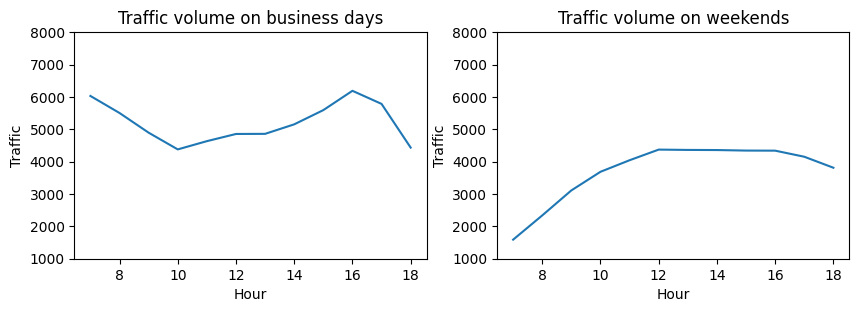

In [10]:
traffic_day['hour'] = traffic_day['date_time'].dt.hour
bd_condition = traffic_day['dayofweek'] < 5
we_condition = traffic_day['dayofweek'] > 4

by_hour_business = traffic_day[bd_condition].groupby('hour').mean()
by_hour_weekend = traffic_day[we_condition].groupby('hour').mean()

plt.figure(figsize = (10, 3))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffic volume on business days')
plt.xlabel('Hour')
plt.ylabel('Traffic')
plt.ylim(1000, 8000)

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic volume on weekends')
plt.xlabel('Hour')
plt.ylabel('Traffic')
plt.ylim(1000, 8000)

plt.show()


We can clearly see two rush hours on business days - 7 a.m. and 16 p.m., which indicates the begining end ending of average business day.

We shold also notice that maximum traffic volume on weekends is similar to minimum on business days.

Now, let's see if there is a correlation between weather and traffic volume

In [11]:
print(traffic_day.corr()['traffic_volume'])

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64


As we saw by analizing traffic volume against month, there is a correlation between temperature and traffic volume. We can see the same from above

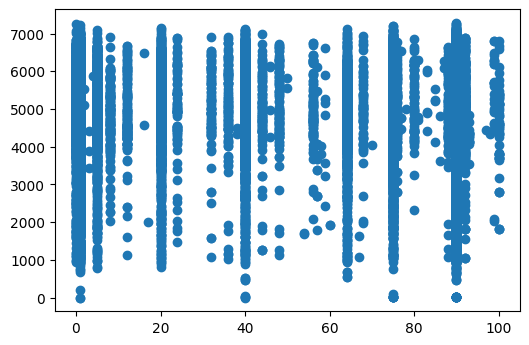

In [12]:
plt.scatter(traffic_day['clouds_all'], traffic_day['traffic_volume'])
plt.show()

(200.0, 350.0)

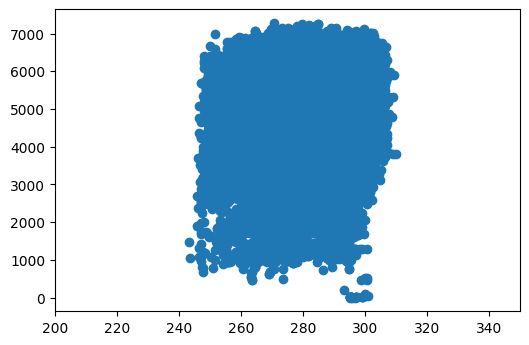

In [13]:
plt.scatter(traffic_day['temp'], traffic_day['traffic_volume'])
plt.xlim(200, 350)

It looks loke both 'temp' and 'clouds_all' are not helpful for our purposes, because there almost no correlation between them and traffic volume.

Maybe categorical weather variables will be more informative

In [14]:
traffic_day['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Smoke', 'Squall'], dtype=object)

In [15]:
traffic_day[traffic_day['weather_main'] == 'Drizzle']['weather_description'].unique()

array(['light intensity drizzle', 'drizzle', 'heavy intensity drizzle',
       'shower drizzle'], dtype=object)

We can conclude that 'weather_description' is a subcategory of 'weather_main'. So, let's focus firstly on 'weather_main'

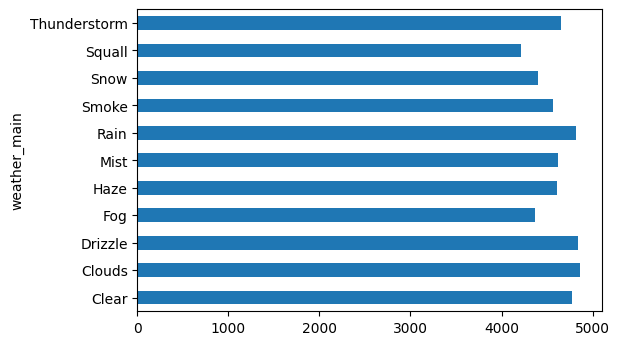

In [16]:
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()

We can't see any correlation here, let's try 'weather_description'

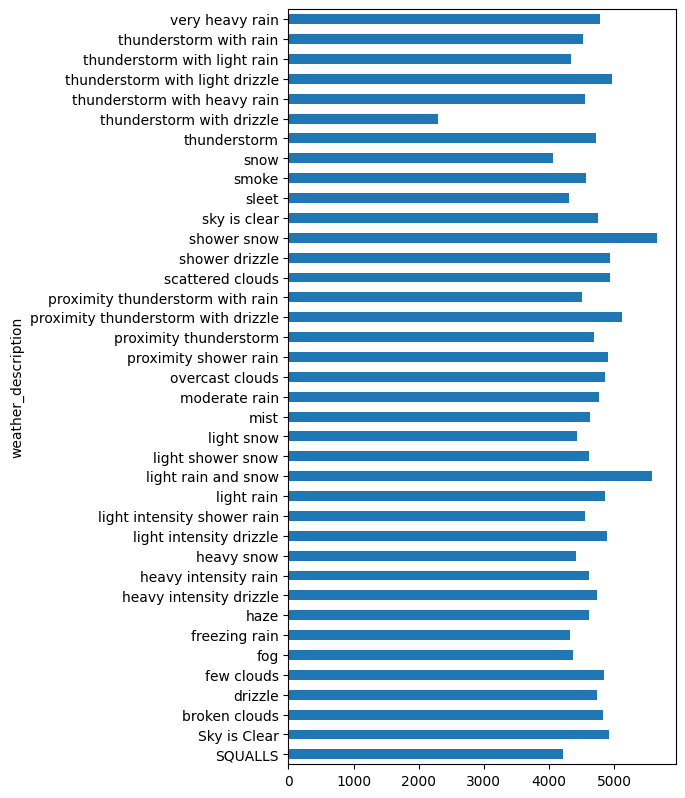

In [17]:
by_weather_description = traffic_day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize = (5, 10))

The only conclusion we can make is that thunderstorm with drizzle may in some extent reduce traffic volume. But in general, there are no strong indicators in weather types

# Conclusion
There is not much usefull information in our research as we have only confirmed obvious sugestions: traffic volume depends mostly on date/time: there are more traffic on rush hours, on week days and on warm months.
But after all we had a good practice using visualization skills we learned during the course